In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
pd.set_option("max_columns", None)
pd.set_option('max_colwidth', None)
from collections import defaultdict

nested_dict = lambda: defaultdict(nested_dict)

    0.5/255  1/255  2/255  4/255   8/255
3     70.86  79.66  77.05  79.04   91.20
5     78.67  86.65  84.02  89.62   96.78
10    84.19  84.23  86.00  94.21   97.85
30    91.10  78.79  91.57  98.33  100.00
50    77.95  72.84  89.88  99.10  100.00


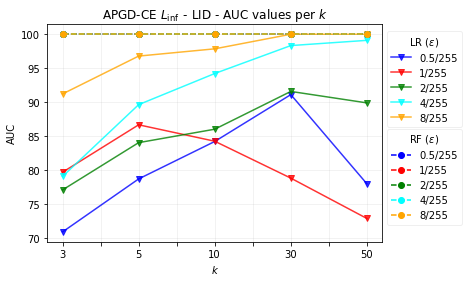

In [2]:
plt.figure(10)

# create data
df_bb = pd.DataFrame({
     '0.5/255': [  70.86,78.67,84.19,91.10,77.95   ], 
     '1/255' :  [  79.66,86.65,84.23,78.79,72.84   ], 
     '2/255' :  [  77.05,84.02,86.00,91.57,89.88   ],
     '4/255'  : [  79.04,89.62,94.21,98.33,99.10   ],
     '8/255'  : [  91.20,96.78,97.85,100.00,100.0  ],
      }, index=["3", "5", "10", "30", "50"]
    )

df_wb = pd.DataFrame({
     '0.5/255': [  100,100,100,100,100.0   ], 
     '1/255'  : [  100,100,100,100,100.0   ], 
     '2/255' :  [  100,100,100,100,100.0   ],
     '4/255'  : [  100,100,100,100,100.0   ],
     '8/255'  : [  100,100,100,100,100.0   ],
      }, index=["3", "5", "10", "30", "50"]
    )

color = [ 'blue', 'red','green','cyan','orange',]

# view data
print(df_bb)

ax = plt.gca()

# plot grouped bar chart
ax1 = df_bb.plot.line(
            ax=ax,
            # x='DataSet',
            xlabel="$k$",
            # rot=0,
            legend=False,
            color=color,
            alpha=0.8,
            marker='v',
            title="APGD-CE $L_{\inf}$ - LID - AUC values per $k$", 
            ylabel='AUC',
            # ylim=[0, 58.0]
        )

ax2 = df_wb.plot.line(
    ax=ax, 
    legend=False,
    marker='o', 
    linestyle='--', 
    color=color
    )

# legend = ax2.legend( title='WB',  loc='center right', framealpha=0.3)
legen2 = plt.legend(df_bb,  bbox_to_anchor=(1.0, 0.75), title='LR ($\epsilon$)', loc=6, framealpha=0.3)
plt.gca().add_artist(legen2)

h, l = ax2.get_legend_handles_labels()
legend = plt.legend(h[5:12], l[5:22],  bbox_to_anchor=(1.0, 0.3), title='RF ($\epsilon$)',  loc=6, framealpha=0.3)

# ax.set_xticks([32, 64 , 128])
ax.grid(which='major', alpha=0.2)

plt.savefig("plots/lines_over_k/line_apgd-ce_Linf.png", bbox_inches='tight')

      0.1    0.2    0.3    0.4    0.5
3   100.0  79.99  78.23  83.06  75.20
5   100.0  82.27  81.26  88.02  87.00
10  100.0  83.99  79.47  81.92  87.01
30  100.0  77.49  85.63  88.77  95.70
50  100.0  79.68  88.98  92.58  95.66


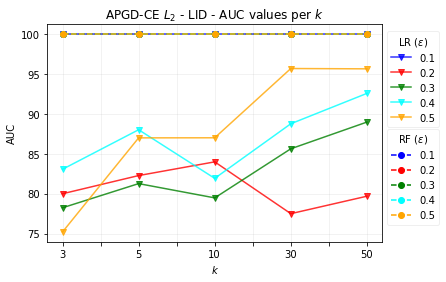

In [3]:
plt.figure(10)

# create data
df_bb = pd.DataFrame({
     '0.1'  : [ 100,100,100,100,100.0     ], 
     '0.2'  : [79.99,82.27,83.99,77.49,79.68 ], 
     '0.3'  : [78.23,81.26,79.47,85.63,88.98 ],
     '0.4'  : [83.06,88.02,81.92,88.77,92.58 ],
     '0.5'  : [75.20,87.00,87.01,95.70,95.66 ],
      }, index=["3", "5", "10", "30", "50"]
    )

df_wb = pd.DataFrame({
    '0.1':  [  100,100,100,100,100.0   ], 
    '0.2':  [  100,100,100,100,100.0   ], 
    '0.3':  [  100,100,100,100,100.0   ],
    '0.4' : [  100,100,100,100,100.0   ],
    '0.5' : [  100,100,100,100,100.0   ],
      }, index=["3", "5", "10", "30", "50"]
    )

color = [ 'blue', 'red','green','cyan','orange',]

# view data
print(df_bb)

ax = plt.gca()

# plot grouped bar chart
ax1 = df_bb.plot.line(
            ax=ax,
            # x='DataSet',
            xlabel="$k$",
            # rot=0,
            legend=False,
            color=color,
            alpha=0.8,
            marker='v',
            title="APGD-CE $L_2$ - LID - AUC values per $k$", 
            ylabel='AUC',
            # ylim=[0, 58.0]
        )

ax2 = df_wb.plot.line(
    ax=ax, 
    legend=False,
    marker='o', 
    linestyle='--', 
    color=color
    )

# legend = ax2.legend( title='WB',  loc='center right', framealpha=0.3)
legen2 = plt.legend(df_bb, bbox_to_anchor=(1.0, 0.75), title='LR ($\epsilon$)', loc=6, framealpha=0.3)
plt.gca().add_artist(legen2)

h, l = ax2.get_legend_handles_labels()
legend = plt.legend( h[5:22], l[5:22], bbox_to_anchor=(1.0, 0.3),  title='RF ($\epsilon$)',  loc=6, framealpha=0.3)

# ax.set_xticks([32, 64 , 128])
ax.grid(which='major', alpha=0.2)

plt.savefig("plots/lines_over_k/line_apgd-ce_L2.png", bbox_inches='tight')

In [14]:
filenames = ['cif10_apgd-ce.csv', 'cif10_apgd-cel2.csv']

dataframes = []

for filename in filenames:
    for run in [20, 21, 22, 23]:
        path = "/home/lorenzp/adversialml/src/analysis/variance/run_{}/{}".format(run, filename)
        df = pd.read_csv(path)
        dataframes.append(df)

df_all = pd.concat(dataframes)
df_all

,Unnamed: 0,asr,auc,f1,acc,pre,tpr,tnr,fnr,asrd
0,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_3/LR/log.txt,100.00,91.20,81.71,86.63,75.00,80.39,88.42,25.00,25.00
1,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_5/LR/log.txt,100.00,96.78,93.03,92.47,93.68,93.07,92.37,6.32,6.32
2,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_30/LR/log.txt,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
3,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_50/LR/log.txt,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
4,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_10/LR/log.txt,100.00,97.85,93.68,93.92,93.42,93.67,93.95,6.58,6.58
...,...,...,...,...,...,...,...,...,...,...
45,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_10/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
46,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_5/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
47,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_30/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00
48,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_50/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11
0,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_3,LR,log.txt
1,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_5,LR,log.txt
2,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_30,LR,log.txt
3,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_50,LR,log.txt
4,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_10,LR,log.txt
...,...,...,...,...,...,...,...,...,...,...,...,...
45,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LID,k_10,RF,log.txt
46,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LID,k_5,RF,log.txt
47,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LID,k_30,RF,log.txt
48,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LID,k_50,RF,log.txt


In [16]:
split[9].str.split('_', -1, expand=True)[1]
split[9]
# split

0      k_3
1      k_5
2     k_30
3     k_50
4     k_10
      ... 
45    k_10
46     k_5
47    k_30
48    k_50
49     k_3
Name: 9, Length: 400, dtype: object

In [7]:
df_all['attack'] = split[6]
df_all['epsilon'] = split[7]
df_all['k'] = split[9].str.split('_', -1, expand=True)[1]
df_all['clf'] = split[10]
df_all

,Unnamed: 0,asr,auc,f1,acc,pre,tpr,tnr,fnr,asrd,attack,epsilon,k,clf
0,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_3/LR/log.txt,100.00,91.20,81.71,86.63,75.00,80.39,88.42,25.00,25.00,apgd-ce,8_255,3,LR
1,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_5/LR/log.txt,100.00,96.78,93.03,92.47,93.68,93.07,92.37,6.32,6.32,apgd-ce,8_255,5,LR
2,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_30/LR/log.txt,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-ce,8_255,30,LR
3,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_50/LR/log.txt,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-ce,8_255,50,LR
4,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_10/LR/log.txt,100.00,97.85,93.68,93.92,93.42,93.67,93.95,6.58,6.58,apgd-ce,8_255,10,LR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_10/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-cel2,04,10,RF
46,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_5/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-cel2,04,5,RF
47,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_30/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-cel2,04,30,RF
48,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LID/k_50/RF/log.txt,26.96,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-cel2,04,50,RF


In [8]:
df_all.to_csv('csv/df_all.csv')

In [9]:
df_all.query("(attack=='apgd-cel2') and (clf=='LR') and (k=='30') and (epsilon=='01')")

,Unnamed: 0,asr,auc,f1,acc,pre,tpr,tnr,fnr,asrd,attack,epsilon,k,clf
23,./data/detection/run_20/cif10/wrn_28_10_10/apgd-cel2/01/LID/k_30/LR/log.txt,27.41,75.82,71.45,71.39,71.58,71.48,71.32,28.42,7.79,apgd-cel2,01,30,LR
1,./data/detection/run_21/cif10/wrn_28_10_10/apgd-cel2/01/LID/k_30/LR/log.txt,27.43,77.82,73.16,72.92,73.68,73.30,72.63,26.32,7.22,apgd-cel2,01,30,LR
20,./data/detection/run_22/cif10/wrn_28_10_10/apgd-cel2/01/LID/k_30/LR/log.txt,99.61,71.01,67.37,69.76,61.32,65.27,73.42,38.68,38.53,apgd-cel2,01,30,LR
0,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/01/LID/k_30/LR/log.txt,26.96,79.27,70.39,74.92,61.32,67.44,79.47,38.68,10.43,apgd-cel2,01,30,LR


(attack=='apgd-ce') and (clf=='LR') and (k=='3') and (epsilon=='05_255') 70.83 1.5471479136354973
(attack=='apgd-ce') and (clf=='LR') and (k=='5') and (epsilon=='05_255') 78.71000000000001 0.7161470984837324
(attack=='apgd-ce') and (clf=='LR') and (k=='10') and (epsilon=='05_255') 86.37 2.4767855512067816
(attack=='apgd-ce') and (clf=='LR') and (k=='30') and (epsilon=='05_255') 86.345 3.907066248051939
(attack=='apgd-ce') and (clf=='LR') and (k=='50') and (epsilon=='05_255') 73.075 4.346465997412914
(attack=='apgd-ce') and (clf=='LR') and (k=='3') and (epsilon=='1_255') 75.86749999999999 2.6321141692563423
(attack=='apgd-ce') and (clf=='LR') and (k=='5') and (epsilon=='1_255') 81.5625 3.666600378188677
(attack=='apgd-ce') and (clf=='LR') and (k=='10') and (epsilon=='1_255') 83.29750000000001 3.0645431959755474
(attack=='apgd-ce') and (clf=='LR') and (k=='30') and (epsilon=='1_255') 79.1875 0.6533184522114779
(attack=='apgd-ce') and (clf=='LR') and (k=='50') and (epsilon=='1_255') 76.46

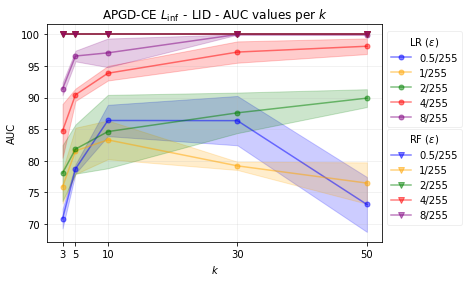

In [32]:
attacks = ['apgd-ce']
clf = ['LR']
ks = [ 3, 5, 10, 30, 50]
epsilonl2  = [  '01',   '02',  '03',  '04',  '05' ]
epsiloninf_label = [ '0.5/255' , '1/255', '2/255', '4/255' , '8/255']
epsiloninf = [ '05_255' , '1_255', '2_255', '4_255' , '8_255']
colors = ['blue', 'orange', 'green', 'red', 'purple']

arr_x = np.array(ks)


means_list = []
stds_list = []



dict_k = nested_dict()

means = np.zeros((5))
stds  = np.zeros((5))

for cla in clf:
    for att in attacks:
        if att == 'apgd-ce':
            epslilons = epsiloninf
        else:
            epslilons = epsilonl2

        means_tmp_list = []
        stds_tmp_list = []            
        for it, eps in enumerate(epslilons):
            
            for it_k, k in enumerate(ks): 
                query = "(attack=='{}') and (clf=='{}') and (k=='{}') and (epsilon=='{}')".format(att, cla, k, eps)
                mean = df_all.query(query).auc.mean()
                std  = df_all.query(query).auc.std()
                means[it_k] = mean
                stds[it_k]  = std
                print(query, mean, std)
            # print("eps", eps, "means: ", means)
                
            dict_k[eps]['means'] = means.copy()
            dict_k[eps]['stds']  = stds.copy()

            
fig, ax = plt.subplots()
plt.xlabel("$k$")
plt.ylabel("AUC")
plt.xticks(ks)

plt.title("APGD-CE $L_{\inf}$ - LID - AUC values per $k$")

for iter2, ep in enumerate(epslilons):
    print(ep, dict_k[ep].keys())
    print(ep, dict_k[ep]['means'])
    plt.fill_between( arr_x, dict_k[ep]['means'] - dict_k[ep]['stds'], dict_k[ep]['means'] +  dict_k[ep]['stds'], alpha=0.2,  color=colors[iter2] )
    plt.plot(arr_x,  dict_k[ep]['means'], marker='o', markersize=5, alpha=0.5, color=colors[iter2], label=epsiloninf_label[iter2])
    
legend = ax.legend( bbox_to_anchor=(1.0, 0.75), title='LR ($\epsilon$)', loc=6, framealpha=0.3)
plt.gca().add_artist(legend)


saved = []
for iter1, ep in enumerate(epslilons):
    saved.append( plt.plot(arr_x,  np.ones(5)*100, marker='v', alpha=0.5, color=colors[iter1], label=epsiloninf_label[iter1]) )


legend2 = plt.legend(saved[0] + saved[1]+ saved[2]+ saved[3]+ saved[4], epsiloninf_label, bbox_to_anchor=(1.0, 0.3),  title='RF ($\epsilon$)',  loc=6, framealpha=0.3)
# plt.gca().add_artist(legend2)


plt.grid(which='major', alpha=0.2)


plt.savefig("plots/lines_over_k/fill_apgd-ce_Linf.png", bbox_inches='tight')

In [12]:
dict_k.keys()

dict_keys(['05/255', '1/255', '2/255', '4/255', '8/255'])

(attack=='apgd-cel2') and (clf=='LR') and (k=='3') and (epsilon=='01') 72.5925 2.809476523008037
(attack=='apgd-cel2') and (clf=='LR') and (k=='5') and (epsilon=='01') 80.9725 2.137013102439945
(attack=='apgd-cel2') and (clf=='LR') and (k=='10') and (epsilon=='01') 85.7325 3.960777491015281
(attack=='apgd-cel2') and (clf=='LR') and (k=='30') and (epsilon=='01') 75.97999999999999 3.6026009123039566
(attack=='apgd-cel2') and (clf=='LR') and (k=='50') and (epsilon=='01') 70.2975 3.3177540093663787
(attack=='apgd-cel2') and (clf=='LR') and (k=='3') and (epsilon=='02') 76.83500000000001 2.438312257826435
(attack=='apgd-cel2') and (clf=='LR') and (k=='5') and (epsilon=='02') 79.885 4.983991037980169
(attack=='apgd-cel2') and (clf=='LR') and (k=='10') and (epsilon=='02') 83.8925 5.963356856670579
(attack=='apgd-cel2') and (clf=='LR') and (k=='30') and (epsilon=='02') 78.1325 3.456822963358121
(attack=='apgd-cel2') and (clf=='LR') and (k=='50') and (epsilon=='02') 79.83500000000001 4.528204206

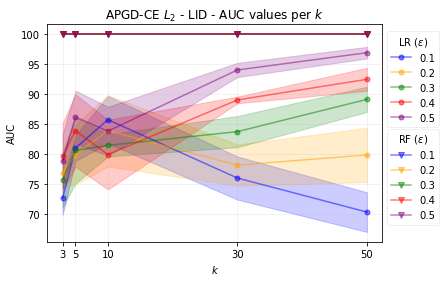

In [33]:
attacks = ['apgd-cel2']
clf = ['LR']
ks = [ 3, 5, 10, 30, 50]
epsilonl2  = [      '01',    '02',    '03',    '04',    '05' ]
epsilonl2_labels  = [      '0.1',    '0.2',    '0.3',    '0.4',    '0.5' ]
epsiloninf = [ '05_255' , '1_255', '2_255', '4_255' , '8_255']
colors = ['blue', 'orange', 'green', 'red', 'purple']

arr_x = np.array(ks)


means_list = []
stds_list = []



dict_k = nested_dict()

means = np.zeros((5))
stds  = np.zeros((5))

for cla in clf:
    for att in attacks:
        if att == 'apgd-ce':
            epslilons = epsiloninf
        else:
            epslilons = epsilonl2

        means_tmp_list = []
        stds_tmp_list = []            
        for it, eps in enumerate(epslilons):
            
            for it_k, k in enumerate(ks): 
                query = "(attack=='{}') and (clf=='{}') and (k=='{}') and (epsilon=='{}')".format(att, cla, k, eps)
                mean = df_all.query(query).auc.mean()
                std  = df_all.query(query).auc.std()
                means[it_k] = mean
                stds[it_k]  = std
                print(query, mean, std)
            # print("eps", eps, "means: ", means)
                
            dict_k[eps]['means'] = means.copy()
            dict_k[eps]['stds']  = stds.copy()

            
fig, ax = plt.subplots()
plt.xlabel("$k$")
plt.ylabel("AUC")
plt.xticks(ks)

plt.title("APGD-CE $L_{2}$ - LID - AUC values per $k$")

for iter2, ep in enumerate(epslilons):
    print(ep, dict_k[ep].keys())
    print(ep, dict_k[ep]['means'])
    plt.fill_between( arr_x, dict_k[ep]['means'] - dict_k[ep]['stds'], dict_k[ep]['means'] +  dict_k[ep]['stds'], alpha=0.2,  color=colors[iter2] )
    plt.plot(arr_x,  dict_k[ep]['means'], marker='o', markersize=5, alpha=0.5, color=colors[iter2], label=epsilonl2_labels[iter2])
    
legend = ax.legend( bbox_to_anchor=(1.0, 0.75), title='LR ($\epsilon$)', loc=6, framealpha=0.3)
plt.gca().add_artist(legend)


saved = []
for iter1, ep in enumerate(epslilons):
    saved.append( plt.plot(arr_x,  np.ones(5)*100, marker='v', alpha=0.5, color=colors[iter1], label=epsilonl2_labels[iter1]) )


legend2 = plt.legend(saved[0] + saved[1]+ saved[2]+ saved[3]+ saved[4], epsilonl2_labels, bbox_to_anchor=(1.0, 0.3),  title='RF ($\epsilon$)',  loc=6, framealpha=0.3)
# plt.gca().add_artist(legend2)


plt.grid(which='major', alpha=0.2)


plt.savefig("plots/lines_over_k/fill_apgd-ce_L2.png", bbox_inches='tight')

In [9]:
filenames = ['cif10_apgd-ce_multilid.csv', 'cif10_apgd-cel2_multilid.csv']

dataframes = []

for filename in filenames:
    for run in [20, 21, 22, 23]:
        path = "/home/lorenzp/adversialml/src/analysis/variance/run_{}/{}".format(run, filename)
        df = pd.read_csv(path)
        dataframes.append(df)

df_all = pd.concat(dataframes)
df_all

# df['point', 'data', 'folder', 'run', 'dataset', 'net', 'attack', 'epsilon', 'def', 'k', 'clf', 'log'] = df['Unnamed: 0'].str.split('/', -1, expand=True)
split =  df_all['Unnamed: 0'].str.split('/',  expand=True)
split

,0,1,2,3,4,5,6,7,8,9,10,11
0,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_30,LR,log.txt
1,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_20,LR,log.txt
2,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_50,LR,log.txt
3,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_5,LR,log.txt
4,.,data,detection,run_20,cif10,wrn_28_10_10,apgd-ce,8_255,LID,k_3,LR,log.txt
...,...,...,...,...,...,...,...,...,...,...,...,...
45,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LIDNOISE,k_30,LR,log.txt
46,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LIDNOISE,k_50,LR,log.txt
47,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LIDNOISE,k_5,LR,log.txt
48,.,data,detection,run_23,cif10,wrn_28_10_10,apgd-cel2,04,LIDNOISE,k_3,LR,log.txt


In [11]:
df_all['attack'] = split[6]
df_all['epsilon'] = split[7]
df_all['defense'] = split[8]
df_all['k'] = split[9].str.split('_', -1, expand=True)[1]
df_all['clf'] = split[10]
df_all

,Unnamed: 0,asr,auc,f1,acc,pre,tpr,tnr,fnr,asrd,attack,epsilon,defense,k,clf
0,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_30/LR/log.txt,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-ce,8_255,LID,30,LR
1,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_20/LR/log.txt,100.00,99.81,97.64,97.63,97.38,97.89,97.37,2.11,2.11,apgd-ce,8_255,LID,20,LR
2,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_50/LR/log.txt,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,apgd-ce,8_255,LID,50,LR
3,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_5/LR/log.txt,100.00,96.78,93.07,93.03,92.47,93.68,92.37,6.32,6.32,apgd-ce,8_255,LID,5,LR
4,./data/detection/run_20/cif10/wrn_28_10_10/apgd-ce/8_255/LID/k_3/LR/log.txt,100.00,91.20,80.39,81.71,86.63,75.00,88.42,25.00,25.00,apgd-ce,8_255,LID,3,LR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LIDNOISE/k_30/LR/log.txt,99.27,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,apgd-cel2,04,LIDNOISE,30,LR
46,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LIDNOISE/k_50/LR/log.txt,99.27,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,apgd-cel2,04,LIDNOISE,50,LR
47,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LIDNOISE/k_5/LR/log.txt,99.27,95.14,87.29,87.24,0.00,87.63,86.84,12.37,12.28,apgd-cel2,04,LIDNOISE,5,LR
48,./data/detection/run_23/cif10/wrn_28_10_10/apgd-cel2/04/LIDNOISE/k_3/LR/log.txt,99.27,87.85,79.34,78.55,0.00,82.37,74.74,17.63,17.50,apgd-cel2,04,LIDNOISE,3,LR


(defense=='LID') and (attack=='apgd-cel2') and (clf=='LR') and (k=='3') and (epsilon=='01') 72.5925 2.809476523008037
(defense=='LID') and (attack=='apgd-cel2') and (clf=='LR') and (k=='5') and (epsilon=='01') 80.9725 2.137013102439945
(defense=='LID') and (attack=='apgd-cel2') and (clf=='LR') and (k=='10') and (epsilon=='01') 85.7325 3.960777491015281
(defense=='LID') and (attack=='apgd-cel2') and (clf=='LR') and (k=='30') and (epsilon=='01') 75.97999999999999 3.6026009123039566
(defense=='LID') and (attack=='apgd-cel2') and (clf=='LR') and (k=='50') and (epsilon=='01') 70.2975 3.3177540093663787
(defense=='LID') and (attack=='apgd-cel2') and (clf=='LR') and (k=='3') and (epsilon=='02') 76.83500000000001 2.438312257826435
(defense=='LID') and (attack=='apgd-cel2') and (clf=='LR') and (k=='5') and (epsilon=='02') 79.885 4.983991037980169
(defense=='LID') and (attack=='apgd-cel2') and (clf=='LR') and (k=='10') and (epsilon=='02') 83.8925 5.963356856670579
(defense=='LID') and (attack=='

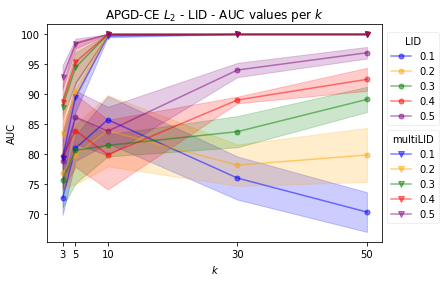

In [26]:
attacks = ['apgd-cel2']
clf = ['LR']
ks = [ 3, 5, 10, 30, 50]
defense = ['LID', 'LIDNOISE']
epsilonl2  =        [  '01',     '02',     '03',     '04',     '05' ]
epsilonl2_labels  = [ '0.1',    '0.2',    '0.3',    '0.4',    '0.5' ]
epsiloninf = [ '05_255' , '1_255', '2_255', '4_255' , '8_255']
colors     = ['blue', 'orange', 'green', 'red', 'purple']

arr_x = np.array(ks)

means_list = []
stds_list = []

dict_k = nested_dict()

means = np.zeros((5))
stds  = np.zeros((5))

for defe in defense:
    for cla in clf:
        for att in attacks:
            if att == 'apgd-ce':
                epslilons = epsiloninf
            else:
                epslilons = epsilonl2

            means_tmp_list = []
            stds_tmp_list = []            
            for it, eps in enumerate(epslilons):

                for it_k, k in enumerate(ks): 
                    query = "(defense=='{}') and (attack=='{}') and (clf=='{}') and (k=='{}') and (epsilon=='{}')".format(defe, att, cla, k, eps)
                    mean = df_all.query(query).auc.mean()
                    std  = df_all.query(query).auc.std()
                    means[it_k] = mean
                    stds[it_k]  = std
                    print(query, mean, std)


                dict_k[defe][eps]['means'] = means.copy()
                dict_k[defe][eps]['stds']  = stds.copy()

            
fig, ax = plt.subplots()
plt.xlabel("$k$")
plt.ylabel("AUC")
plt.xticks(ks)

plt.title("APGD-CE $L_{2}$ - LID - AUC values per $k$")

for iter2, ep in enumerate(epslilons):
    print(ep, dict_k[defense[0]][ep].keys())
    print(ep, dict_k[defense[0]][ep]['means'])
    plt.fill_between( arr_x, dict_k[defense[0]][ep]['means'] - dict_k[defense[0]][ep]['stds'], dict_k[defense[0]][ep]['means'] +  dict_k[defense[0]][ep]['stds'], alpha=0.2,  color=colors[iter2] )
    plt.plot(arr_x,  dict_k[defense[0]][ep]['means'], marker='o', markersize=5, alpha=0.5, color=colors[iter2], label=epsilonl2_labels[iter2])
    
legend = ax.legend( bbox_to_anchor=(1.0, 0.75), title='LID', loc=6, framealpha=0.3)
plt.gca().add_artist(legend)


# saved = []
# for iter1, ep in enumerate(epslilons):
#     saved.append( plt.plot(arr_x,  np.ones(5)*100, marker='v', alpha=0.5, color=colors[iter1], label=epsilonl2_labels[iter1]) )

    
    
for iter2, ep in enumerate(epslilons):
    print(ep, dict_k[defense[1]][ep].keys())
    print(ep, dict_k[defense[1]][ep]['means'])
    plt.fill_between( arr_x, dict_k[defense[1]][ep]['means'] - dict_k[defense[1]][ep]['stds'], dict_k[defense[1]][ep]['means'] +  dict_k[defense[1]][ep]['stds'], alpha=0.2,  color=colors[iter2] )
    plt.plot(arr_x,  dict_k[defense[1]][ep]['means'], marker='v', markersize=5, alpha=0.5, color=colors[iter2], label=epsilonl2_labels[iter2])
    

legend2 = plt.legend(saved[0] + saved[1]+ saved[2]+ saved[3]+ saved[4], epsilonl2_labels, bbox_to_anchor=(1.0, 0.3),  title='multiLID',  loc=6, framealpha=0.3)
# plt.gca().add_artist(legend2)


# plt.grid(which='major', alpha=0.2)


plt.savefig("plots/lines_over_k/mulidlidfill_apgd-ce_L2.png", bbox_inches='tight')

(defense=='LID') and (attack=='apgd-ce') and (clf=='LR') and (k=='3') and (epsilon=='05_255') 70.83 1.5471479136354973
(defense=='LID') and (attack=='apgd-ce') and (clf=='LR') and (k=='5') and (epsilon=='05_255') 78.71000000000001 0.7161470984837324
(defense=='LID') and (attack=='apgd-ce') and (clf=='LR') and (k=='10') and (epsilon=='05_255') 86.37 2.4767855512067816
(defense=='LID') and (attack=='apgd-ce') and (clf=='LR') and (k=='30') and (epsilon=='05_255') 86.345 3.907066248051939
(defense=='LID') and (attack=='apgd-ce') and (clf=='LR') and (k=='50') and (epsilon=='05_255') 73.075 4.346465997412914
(defense=='LID') and (attack=='apgd-ce') and (clf=='LR') and (k=='3') and (epsilon=='1_255') 75.86749999999999 2.6321141692563423
(defense=='LID') and (attack=='apgd-ce') and (clf=='LR') and (k=='5') and (epsilon=='1_255') 81.5625 3.666600378188677
(defense=='LID') and (attack=='apgd-ce') and (clf=='LR') and (k=='10') and (epsilon=='1_255') 83.29750000000001 3.0645431959755474
(defense==

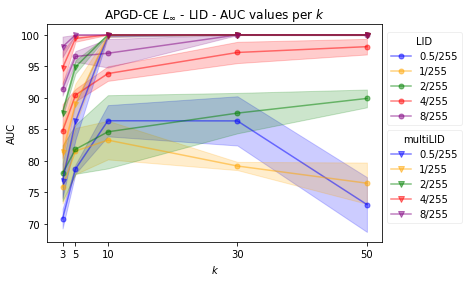

In [30]:
attacks = ['apgd-ce']
clf = ['LR']
ks = [ 3, 5, 10, 30, 50]
defense = ['LID', 'LIDNOISE']
epsilonl2  =        [  '01',     '02',     '03',     '04',     '05' ]
epsilonl2_labels  = [ '0.1',    '0.2',    '0.3',    '0.4',    '0.5' ]
epsiloninf_label = [ '0.5/255' , '1/255', '2/255', '4/255' , '8/255']
epsiloninf = [ '05_255' , '1_255', '2_255', '4_255' , '8_255']
colors     = ['blue', 'orange', 'green', 'red', 'purple']

arr_x = np.array(ks)

means_list = []
stds_list = []

dict_k = nested_dict()

means = np.zeros((5))
stds  = np.zeros((5))

for defe in defense:
    for cla in clf:
        for att in attacks:
            if att == 'apgd-ce':
                epslilons = epsiloninf
            else:
                epslilons = epsilonl2

            means_tmp_list = []
            stds_tmp_list = []            
            for it, eps in enumerate(epslilons):

                for it_k, k in enumerate(ks): 
                    query = "(defense=='{}') and (attack=='{}') and (clf=='{}') and (k=='{}') and (epsilon=='{}')".format(defe, att, cla, k, eps)
                    mean = df_all.query(query).auc.mean()
                    std  = df_all.query(query).auc.std()
                    means[it_k] = mean
                    stds[it_k]  = std
                    print(query, mean, std)


                dict_k[defe][eps]['means'] = means.copy()
                dict_k[defe][eps]['stds']  = stds.copy()

            
fig, ax = plt.subplots()
plt.xlabel("$k$")
plt.ylabel("AUC")
plt.xticks(ks)

plt.title("APGD-CE $L_{\infty}$ - LID - AUC values per $k$")

for iter2, ep in enumerate(epslilons):
    print(ep, dict_k[defense[0]][ep].keys())
    print(ep, dict_k[defense[0]][ep]['means'])
    plt.fill_between( arr_x, dict_k[defense[0]][ep]['means'] - dict_k[defense[0]][ep]['stds'], dict_k[defense[0]][ep]['means'] +  dict_k[defense[0]][ep]['stds'], alpha=0.2,  color=colors[iter2] )
    plt.plot(arr_x,  dict_k[defense[0]][ep]['means'], marker='o', markersize=5, alpha=0.5, color=colors[iter2], label=epsiloninf_label[iter2])
    
legend = ax.legend( bbox_to_anchor=(1.0, 0.75), title='LID', loc=6, framealpha=0.3)
plt.gca().add_artist(legend)


# saved = []
# for iter1, ep in enumerate(epslilons):
#     saved.append( plt.plot(arr_x,  np.ones(5)*100, marker='v', alpha=0.5, color=colors[iter1], label=epsilonl2_labels[iter1]) )

    
    
for iter2, ep in enumerate(epslilons):
    print(ep, dict_k[defense[1]][ep].keys())
    print(ep, dict_k[defense[1]][ep]['means'])
    plt.fill_between( arr_x, dict_k[defense[1]][ep]['means'] - dict_k[defense[1]][ep]['stds'], dict_k[defense[1]][ep]['means'] +  dict_k[defense[1]][ep]['stds'], alpha=0.2,  color=colors[iter2] )
    plt.plot(arr_x,  dict_k[defense[1]][ep]['means'], marker='v', markersize=5, alpha=0.5, color=colors[iter2], label=epsiloninf_label[iter2])
    

legend2 = plt.legend(saved[0] + saved[1]+ saved[2]+ saved[3]+ saved[4], epsiloninf_label, bbox_to_anchor=(1.0, 0.3),  title='multiLID',  loc=6, framealpha=0.3)
# plt.gca().add_artist(legend2)


# plt.grid(which='major', alpha=0.2)


plt.savefig("plots/lines_over_k/mulidlidfill_apgd-ce.png", bbox_inches='tight')